In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ipl_match_stats = pd.read_csv("IPL_Matches_2008_2021.csv")
ipl_match_stats.head(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma
5,1254101,Dubai,2021-10-08,2021,56,Delhi Capitals,Royal Challengers Bangalore,Dubai International Cricket Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,7.0,NaN,KS Bharat,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SS Iyer', ...","['V Kohli', 'D Padikkal', 'KS Bharat', 'AB de ...",KN Ananthapadmanabhan,Nitin Menon
6,1254106,Sharjah,2021-10-07,2021,54,Kolkata Knight Riders,Rajasthan Royals,Sharjah Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,86.0,NaN,Shivam Mavi,"['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...","['YBK Jaiswal', 'LS Livingstone', 'SV Samson',...",MA Gough,HAS Khalid
7,1254094,Dubai,2021-10-07,2021,53,Chennai Super Kings,Punjab Kings,Dubai International Cricket Stadium,Punjab Kings,field,N,Punjab Kings,Wickets,6.0,NaN,KL Rahul,"['RD Gaikwad', 'F du Plessis', 'MM Ali', 'RV U...","['KL Rahul', 'MA Agarwal', 'SN Khan', 'M Shahr...",K Srinivasan,RK Illingworth
8,1254095,Abu Dhabi,2021-10-06,2021,52,Sunrisers Hyderabad,Royal Challengers Bangalore,"Zayed Cricket Stadium, Abu Dhabi",Royal Challengers Bangalore,field,N,Sunrisers Hyderabad,Runs,4.0,NaN,KS Williamson,"['JJ Roy', 'Abhishek Sharma', 'KS Williamson',...","['V Kohli', 'D Padikkal', 'DT Christian', 'KS ...",S Ravi,UV Gandhe
9,1254093,Sharjah,2021-10-05,2021,51,Rajasthan Royals,Mumbai Indians,Sharjah Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,8.0,NaN,NM Coulter-Nile,"['E Lewis', 'YBK Jaiswal', 'SV Samson', 'S Dub...","['RG Sharma', 'Ishan Kishan', 'SA Yadav', 'HH ...",AK Chaudhary,MA Gough


In [3]:
#removing unnecessary columns
ipl_match_stats = ipl_match_stats.drop(["Team1Players","Team2Players","Umpire1","Umpire2"], axis = 1)

In [4]:
ipl_match_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               876 non-null    int64  
 1   City             825 non-null    object 
 2   Date             876 non-null    object 
 3   Season           876 non-null    object 
 4   MatchNumber      876 non-null    object 
 5   Team1            876 non-null    object 
 6   Team2            876 non-null    object 
 7   Venue            876 non-null    object 
 8   TossWinner       876 non-null    object 
 9   TossDecision     876 non-null    object 
 10  SuperOver        872 non-null    object 
 11  WinningTeam      872 non-null    object 
 12  WonBy            876 non-null    object 
 13  Margin           858 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  872 non-null    object 
dtypes: float64(1), int64(1), object(14)
memory usage: 109.6+ KB


In [5]:
#from above result, it is evident that four matches did not have results. we can delete those rows as they are unnecessary
ipl_match_stats[(ipl_match_stats["WonBy"]=="NoResults") & (ipl_match_stats["Player_of_Match"].isnull())]

#drop the rows with null values
ipl_match_stats = ipl_match_stats.drop(ipl_match_stats[ipl_match_stats.WonBy =="NoResults"].index)

In [6]:
ipl_match_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 875
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               872 non-null    int64  
 1   City             821 non-null    object 
 2   Date             872 non-null    object 
 3   Season           872 non-null    object 
 4   MatchNumber      872 non-null    object 
 5   Team1            872 non-null    object 
 6   Team2            872 non-null    object 
 7   Venue            872 non-null    object 
 8   TossWinner       872 non-null    object 
 9   TossDecision     872 non-null    object 
 10  SuperOver        872 non-null    object 
 11  WinningTeam      872 non-null    object 
 12  WonBy            872 non-null    object 
 13  Margin           858 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  872 non-null    object 
dtypes: float64(1), int64(1), object(14)
memory usage: 115.8+ KB


In [7]:
#import ball_by_ball stats csv
ipl_bb = pd.read_csv("IPL_Ball_by_Ball_2008_2021.csv")


In [8]:
    ipl_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208042 entries, 0 to 208041
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 208042 non-null  int64 
 1   innings            208042 non-null  int64 
 2   overs              208042 non-null  int64 
 3   ballnumber         208042 non-null  int64 
 4   batter             208042 non-null  object
 5   bowler             208042 non-null  object
 6   non-striker        208042 non-null  object
 7   extra_type         10999 non-null   object
 8   batsman_run        208042 non-null  int64 
 9   extras_run         208042 non-null  int64 
 10  total_run          208042 non-null  int64 
 11  non_boundary       208042 non-null  int64 
 12  isWicketDelivery   208042 non-null  int64 
 13  player_out         10239 non-null   object
 14  kind               10239 non-null   object
 15  fielders_involved  7284 non-null    object
 16  BattingTeam        2

In [9]:
#check the number of balls played by a batter
#we are creating the resultset as a separate dataset by itself
balls_faced = pd.DataFrame(ipl_bb.groupby(['batter']).size(), columns = ["balls_faced"])
balls_faced = balls_faced.reset_index()

In [10]:
balls_faced.head(10)

,batter,balls_faced
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
5,A Flintoff,57
6,A Kumble,49
7,A Mishra,410
8,A Mithun,26
9,A Mukund,23


In [11]:
#runs scored by each batsman
runs = pd.DataFrame(ipl_bb.groupby(['batter','batsman_run']).size(), columns = ["runs_scored"])
runs = runs.reset_index()
#runs = runs.drop(runs[runs.batsman_run == 0].index)
runs.head(10)

,batter,batsman_run,runs_scored
0,A Ashish Reddy,0,61
1,A Ashish Reddy,1,83
2,A Ashish Reddy,2,20
3,A Ashish Reddy,3,1
4,A Ashish Reddy,4,16
5,A Ashish Reddy,6,15
6,A Chandila,0,3
7,A Chandila,1,4
8,A Chopra,0,45
9,A Chopra,1,21


In [12]:
#total runs = runs per ball * number of times
runs["total"] = runs["batsman_run"]*runs["runs_scored"]
runs.head(10)

,batter,batsman_run,runs_scored,total
0,A Ashish Reddy,0,61,0
1,A Ashish Reddy,1,83,83
2,A Ashish Reddy,2,20,40
3,A Ashish Reddy,3,1,3
4,A Ashish Reddy,4,16,64
5,A Ashish Reddy,6,15,90
6,A Chandila,0,3,0
7,A Chandila,1,4,4
8,A Chopra,0,45,0
9,A Chopra,1,21,21


In [13]:
#drop unnecessary columns
runs = runs.drop(["batsman_run","runs_scored"], axis = 1)
runs

,batter,total
0,A Ashish Reddy,0
1,A Ashish Reddy,83
2,A Ashish Reddy,40
3,A Ashish Reddy,3
4,A Ashish Reddy,64
...,...,...
2566,Z Khan,0
2567,Z Khan,47
2568,Z Khan,14
2569,Z Khan,44


In [14]:
runs_scored = pd.DataFrame(runs.groupby(['batter']).sum())
runs_scored = runs_scored.reset_index()
runs_scored

,batter,total
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
556,YV Takawale,192
557,Yashpal Singh,47
558,Younis Khan,3
559,Yuvraj Singh,2754


In [15]:
#check the number of balls bowled by a bowler
#we are creating the resultset as a separate dataset by itself
balls_bowled = pd.DataFrame(ipl_bb.groupby(['bowler']).size(), columns = ["balls_bowled"])
balls_bowled = balls_bowled.reset_index()

In [16]:
balls_bowled.head(10)

,bowler,balls_bowled
0,A Ashish Reddy,270
1,A Chandila,234
2,A Choudhary,108
3,A Dananjaya,25
4,A Flintoff,66
5,A Kumble,983
6,A Mishra,3317
7,A Mithun,312
8,A Nehra,1974
9,A Nel,18


In [17]:
#groupby the data by bowler name and count the number of 0's and 1's in the isWicketDelivery column
wickets = pd.DataFrame(ipl_bb.groupby(['bowler','isWicketDelivery']).size(), columns = ["wickets_taken"])

wickets.head(10)

wickets_taken
bowler         isWicketDelivery               
A Ashish Reddy 0                           251
               1                            19
A Chandila     0                           223
               1                            11
A Choudhary    0                           103
               1                             5
A Dananjaya    0                            25
A Flintoff     0                            64
               1                             2
A Kumble       0                           934

In [18]:
#reset the index of new dataframe, to perform operations
wickets = wickets.reset_index()
wickets["total"] = wickets["isWicketDelivery"]*wickets["wickets_taken"]


In [19]:
#we dont need the rows which have isWicketDelivery = 0, hence remove them
#wickets = wickets.drop(wickets[wickets.isWicketDelivery == 0].index)

In [20]:
wickets.head(10)

,bowler,isWicketDelivery,wickets_taken,total
0,A Ashish Reddy,0,251,0
1,A Ashish Reddy,1,19,19
2,A Chandila,0,223,0
3,A Chandila,1,11,11
4,A Choudhary,0,103,0
5,A Choudhary,1,5,5
6,A Dananjaya,0,25,0
7,A Flintoff,0,64,0
8,A Flintoff,1,2,2
9,A Kumble,0,934,0


In [21]:
#remove the isWicketDelivery column as it is unnecessary
wickets = wickets.drop(["isWicketDelivery","wickets_taken"], axis = 1)

In [22]:
wickets_taken = pd.DataFrame(wickets.groupby(['bowler']).sum())
wickets_taken = wickets_taken.reset_index()
wickets_taken

,bowler,total
0,A Ashish Reddy,19
1,A Chandila,11
2,A Choudhary,5
3,A Dananjaya,0
4,A Flintoff,2
...,...,...
435,YA Abdulla,15
436,YK Pathan,46
437,YS Chahal,143
438,Yuvraj Singh,39


In [23]:
#matches played by a batter
match_bat = pd.DataFrame(ipl_bb.groupby(['batter','ID']).size(), columns = ["match_bat"])
match_bat.head(30)
match_bat.reset_index()
match_bat["match_bat"] = 1
match_bat.head(30)
match_bat.reset_index()
match_bat1 = pd.DataFrame(match_bat.groupby(['batter']).sum())
match_bat1 = match_bat1.reset_index()
match_bat1.head(10)

,batter,match_bat
0,A Ashish Reddy,23
1,A Chandila,2
2,A Chopra,6
3,A Choudhary,3
4,A Dananjaya,1
5,A Flintoff,3
6,A Kumble,15
7,A Mishra,54
8,A Mithun,6
9,A Mukund,2


In [24]:
#matches played by a bowler
match_bowl = pd.DataFrame(ipl_bb.groupby(['bowler','ID']).size(), columns = ["match_bowl"])
match_bowl.head(30)
match_bowl.reset_index()
match_bowl["match_bowl"] = 1
match_bowl.head(30)
match_bowl1 = pd.DataFrame(match_bowl.groupby(['bowler']).sum())
match_bowl1.head(10)

,match_bowl
bowler,
A Ashish Reddy,20
A Chandila,12
A Choudhary,5
A Dananjaya,1
A Flintoff,3
A Kumble,42
A Mishra,154
A Mithun,16
A Nehra,88


In [25]:
match_bowl1 = match_bowl1.reset_index()
match_bowl1

,bowler,match_bowl
0,A Ashish Reddy,20
1,A Chandila,12
2,A Choudhary,5
3,A Dananjaya,1
4,A Flintoff,3
...,...,...
435,YA Abdulla,11
436,YK Pathan,82
437,YS Chahal,113
438,Yuvraj Singh,73


In [26]:
#number of times a batsman got out
out_num = pd.DataFrame(ipl_bb.groupby(['batter','isWicketDelivery']).size(), columns = ["got_out"])
out_num = out_num.reset_index()
out_num = out_num.drop(out_num[out_num.isWicketDelivery == 0].index)

In [27]:
out_num

,batter,isWicketDelivery,got_out
1,A Ashish Reddy,1,15
3,A Chandila,1,1
5,A Chopra,1,5
7,A Choudhary,1,2
10,A Flintoff,1,2
...,...,...,...
1070,YV Takawale,1,8
1072,Yashpal Singh,1,4
1074,Younis Khan,1,1
1076,Yuvraj Singh,1,109


In [28]:
out_num = out_num.drop(["isWicketDelivery"], axis = 1)

In [29]:
out_num

,batter,got_out
1,A Ashish Reddy,15
3,A Chandila,1
5,A Chopra,5
7,A Choudhary,2
10,A Flintoff,2
...,...,...
1070,YV Takawale,8
1072,Yashpal Singh,4
1074,Younis Khan,1
1076,Yuvraj Singh,109


In [30]:
balls_faced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   batter       561 non-null    object
 1   balls_faced  561 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [31]:
runs_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   batter  561 non-null    object
 1   total   561 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [32]:
match_bat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   batter     561 non-null    object
 1   match_bat  561 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [33]:
out_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 1 to 1078
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   batter   526 non-null    object
 1   got_out  526 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.3+ KB


In [34]:
#let us join all the batter dataframes to get batsman stats in one dataframe
#join balls_faced and runs_scored
df = pd.merge(balls_faced, runs_scored, on=['batter'])
df.columns = df.columns.str.replace('total', 'total_runs_scored')
df


,batter,balls_faced,total_runs_scored
0,A Ashish Reddy,196,280
1,A Chandila,7,4
2,A Chopra,75,53
3,A Choudhary,20,25
4,A Dananjaya,5,4
...,...,...,...
556,YV Takawale,183,192
557,Yashpal Singh,67,47
558,Younis Khan,7,3
559,Yuvraj Singh,2207,2754


In [35]:
#join match_bat1 and out_num
df1 = pd.merge(match_bat1, out_num, on='batter', how='outer')
df1

,batter,match_bat,got_out
0,A Ashish Reddy,23,15.0
1,A Chandila,2,1.0
2,A Chopra,6,5.0
3,A Choudhary,3,2.0
4,A Dananjaya,1,NaN
...,...,...,...
556,YV Takawale,10,8.0
557,Yashpal Singh,4,4.0
558,Younis Khan,1,1.0
559,Yuvraj Singh,126,109.0


In [36]:
#calculate batting average and strike rate
bat = pd.merge(df, df1, on=['batter'])
bat = bat.fillna(0)
bat["bat_avg"] = round(bat["total_runs_scored"]/bat["got_out"],2)
bat["bat_sr"] = round((bat["total_runs_scored"]/bat["balls_faced"])*100,2)
bat = bat.replace([np.inf, -np.inf], np.nan)
bat

,batter,balls_faced,total_runs_scored,match_bat,got_out,bat_avg,bat_sr
0,A Ashish Reddy,196,280,23,15.0,18.67,142.86
1,A Chandila,7,4,2,1.0,4.00,57.14
2,A Chopra,75,53,6,5.0,10.60,70.67
3,A Choudhary,20,25,3,2.0,12.50,125.00
4,A Dananjaya,5,4,1,0.0,NaN,80.00
...,...,...,...,...,...,...,...
556,YV Takawale,183,192,10,8.0,24.00,104.92
557,Yashpal Singh,67,47,4,4.0,11.75,70.15
558,Younis Khan,7,3,1,1.0,3.00,42.86
559,Yuvraj Singh,2207,2754,126,109.0,25.27,124.78


In [37]:
balls_bowled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bowler        440 non-null    object
 1   balls_bowled  440 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


In [38]:
wickets_taken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bowler  440 non-null    object
 1   total   440 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


In [39]:
match_bowl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bowler      440 non-null    object
 1   match_bowl  440 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


In [40]:
#let us join all the bowler dataframes to get bowler stats in one dataframe
#join balls_faced and runs_scored
df2 = pd.merge(balls_bowled, wickets_taken, on=['bowler'])
df2.columns = df2.columns.str.replace('total', 'total_wickets_taken')
df2

,bowler,balls_bowled,total_wickets_taken
0,A Ashish Reddy,270,19
1,A Chandila,234,11
2,A Choudhary,108,5
3,A Dananjaya,25,0
4,A Flintoff,66,2
...,...,...,...
435,YA Abdulla,222,15
436,YK Pathan,1184,46
437,YS Chahal,2511,143
438,Yuvraj Singh,882,39


In [41]:
ball = pd.merge(df2, match_bowl1, on=['bowler'])
#ball = ball.drop(["index"], axis = 1)
ball


,bowler,balls_bowled,total_wickets_taken,match_bowl
0,A Ashish Reddy,270,19,20
1,A Chandila,234,11,12
2,A Choudhary,108,5,5
3,A Dananjaya,25,0,1
4,A Flintoff,66,2,3
...,...,...,...,...
435,YA Abdulla,222,15,11
436,YK Pathan,1184,46,82
437,YS Chahal,2511,143,113
438,Yuvraj Singh,882,39,73


In [42]:
#calculate bowling strike rate
ball["ball_sr"] = round(ball["balls_bowled"]/ball["total_wickets_taken"],2)
ball = ball.replace([np.inf, -np.inf], np.nan)
ball

,bowler,balls_bowled,total_wickets_taken,match_bowl,ball_sr
0,A Ashish Reddy,270,19,20,14.21
1,A Chandila,234,11,12,21.27
2,A Choudhary,108,5,5,21.60
3,A Dananjaya,25,0,1,NaN
4,A Flintoff,66,2,3,33.00
...,...,...,...,...,...
435,YA Abdulla,222,15,11,14.80
436,YK Pathan,1184,46,82,25.74
437,YS Chahal,2511,143,113,17.56
438,Yuvraj Singh,882,39,73,22.62


In [43]:
#join the batting stats and bowling stats into one dataframe
#change the column names 'batter' and 'bowler' to 'player' to avoid confusion
bat.columns = bat.columns.str.replace('batter', 'player')
ball.columns = ball.columns.str.replace('bowler', 'player')
stats = pd.merge(bat, ball, on='player', how='outer')
stats.fillna(0)
stats




,player,balls_faced,total_runs_scored,match_bat,got_out,bat_avg,bat_sr,balls_bowled,total_wickets_taken,match_bowl,ball_sr
0,A Ashish Reddy,196.0,280.0,23.0,15.0,18.67,142.86,270.0,19.0,20.0,14.21
1,A Chandila,7.0,4.0,2.0,1.0,4.00,57.14,234.0,11.0,12.0,21.27
2,A Chopra,75.0,53.0,6.0,5.0,10.60,70.67,NaN,NaN,NaN,NaN
3,A Choudhary,20.0,25.0,3.0,2.0,12.50,125.00,108.0,5.0,5.0,21.60
4,A Dananjaya,5.0,4.0,1.0,0.0,NaN,80.00,25.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
604,SS Mundhe,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,1.0,7.00
605,SS Sarkar,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1.0,2.0,25.00
606,TP Sudhindra,NaN,NaN,NaN,NaN,NaN,NaN,74.0,1.0,3.0,74.00
607,Tejas Baroka,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0,1.0,NaN


In [44]:
#now we merge this stat dataframe with the ipl_match_stats dataset that has info on man of the match
ipl_match_stats

#remove unnecessary cols from ipl_match_stats
cols = ["ID",	"City",	"Date", "MatchNumber",	"Team1",	"Team2",	"Venue",	"TossWinner",	"TossDecision",	"SuperOver",	"WinningTeam",	"WonBy",	"Margin","method"]
ipl_match_stats = ipl_match_stats.drop(cols, axis = 1)
ipl_match_stats



,Season,Player_of_Match
0,2021,F du Plessis
1,2021,VR Iyer
2,2021,SP Narine
3,2021,RD Gaikwad
4,2021,Ishan Kishan
...,...,...
871,2007/08,MV Boucher
872,2007/08,DJ Hussey
873,2007/08,MF Maharoof
874,2007/08,MEK Hussey


In [45]:
count_data = ipl_match_stats.groupby("Player_of_Match").count()
count_data = count_data.reset_index()
count_data.columns = count_data.columns.str.replace('Player_of_Match', 'player')
count_data.columns = count_data.columns.str.replace('Season', 'man_of_match')

count_data

,player,man_of_match
0,A Chandila,1
1,A Kumble,3
2,A Mishra,12
3,A Nehra,6
4,A Nortje,3
...,...,...
237,Washington Sundar,1
238,YK Pathan,16
239,YS Chahal,4
240,Yuvraj Singh,5


In [46]:
#now lets merge stats dataframe with count_data
tot_stats = pd.merge(stats, count_data, on='player', how='outer')
tot_stats = tot_stats.fillna(0)
tot_stats = pd.DataFrame(tot_stats)


In [47]:
#now let us try to correlate man_of_match with various stats
corr_stats = tot_stats.drop(["balls_faced","match_bat","balls_bowled","match_bowl"], axis = 1)
corr_stats.corr()

,total_runs_scored,got_out,bat_avg,bat_sr,total_wickets_taken,ball_sr,man_of_match
total_runs_scored,1.000000,0.974520,0.558933,0.342334,0.018036,-0.086149,0.837640
got_out,0.974520,1.000000,0.537604,0.373378,0.112724,-0.075434,0.812119
bat_avg,0.558933,0.537604,1.000000,0.641256,-0.032091,-0.145194,0.446817
bat_sr,0.342334,0.373378,0.641256,1.000000,0.091916,-0.075382,0.297391
total_wickets_taken,0.018036,0.112724,-0.032091,0.091916,1.000000,0.202479,0.331424
ball_sr,-0.086149,-0.075434,-0.145194,-0.075382,0.202479,1.000000,-0.011981
man_of_match,0.837640,0.812119,0.446817,0.297391,0.331424,-0.011981,1.000000


In [48]:
desc = tot_stats.describe()
desc
#tot_stats[(tot_stats["total_runs_scored"] > 423)

,balls_faced,total_runs_scored,match_bat,got_out,bat_avg,bat_sr,balls_bowled,total_wickets_taken,match_bowl,ball_sr,man_of_match
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,341.612479,423.525452,21.463054,16.812808,13.982184,92.035287,341.612479,16.812808,17.021346,14.701576,1.431856
std,724.143746,931.865265,35.444161,29.920087,11.709776,44.869810,613.100013,31.456284,28.778782,14.543181,3.063318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,2.000000,1.000000,4.000000,68.420000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,55.000000,7.000000,5.000000,12.000000,104.690000,68.000000,3.000000,5.000000,16.770000,0.000000
75%,251.000000,293.000000,22.000000,16.000000,21.700000,123.380000,342.000000,17.000000,20.000000,22.440000,1.000000
max,4960.000000,6293.000000,207.000000,189.000000,88.000000,250.000000,3605.000000,190.000000,171.000000,115.000000,25.000000


<AxesSubplot:xlabel='total_runs_scored', ylabel='man_of_match'>

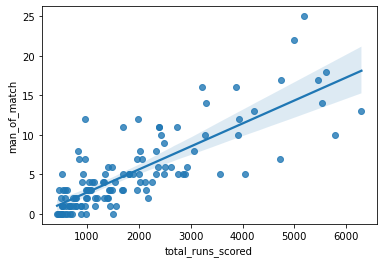

In [49]:
#how many batters who scored above avg runs got man of the match
xaxis = tot_stats[(tot_stats["total_runs_scored"] > 423)]["total_runs_scored"]
yaxis = tot_stats[(tot_stats["total_runs_scored"] > 423)]["man_of_match"]
sns.regplot(x=xaxis,y=yaxis)


<AxesSubplot:xlabel='bat_avg', ylabel='man_of_match'>

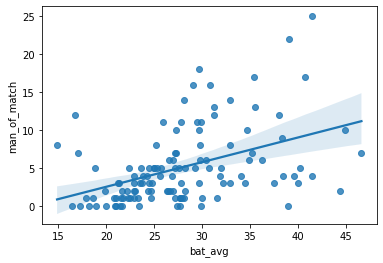

In [62]:
#correlation between batters whose batting_avg is more than avg and man of match awards
xaxis = tot_stats[(tot_stats["bat_avg"] > 13.98) & (tot_stats["balls_faced"] > 341.6)]["bat_avg"]
yaxis = tot_stats[(tot_stats["bat_avg"] > 13.98) & (tot_stats["balls_faced"] > 341.6)]["man_of_match"]
sns.regplot(x=xaxis,y=yaxis)

<AxesSubplot:xlabel='bat_sr', ylabel='man_of_match'>

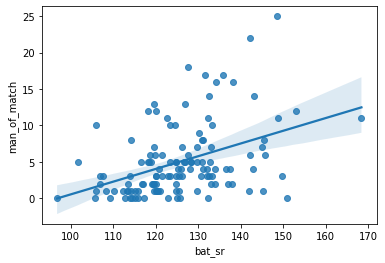

In [63]:
#correlation between batters whose strike rate is more than avg and man of match awards
xaxis = tot_stats[(tot_stats["bat_sr"] > 92.03) & (tot_stats["balls_faced"] > 341.6)]["bat_sr"]
yaxis = tot_stats[(tot_stats["bat_sr"] > 92.03) & (tot_stats["balls_faced"] > 341.6)]["man_of_match"]
sns.regplot(x=xaxis,y=yaxis)

<AxesSubplot:xlabel='ball_sr', ylabel='man_of_match'>

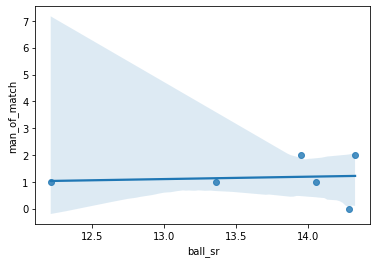

In [66]:
#correlation between bowlers whose strike rate is less than avg and man of match awards
xaxis = tot_stats[(tot_stats["ball_sr"] < 14.7) & (tot_stats["balls_bowled"] > 341.6)]["ball_sr"]
yaxis = tot_stats[(tot_stats["ball_sr"] < 14.7) & (tot_stats["balls_bowled"] > 341.6)]["man_of_match"]
sns.regplot(x=xaxis,y=yaxis)

<AxesSubplot:xlabel='total_wickets_taken', ylabel='man_of_match'>

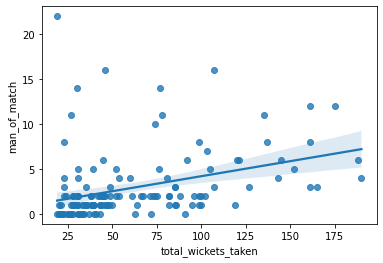

In [68]:
#correlation between bowlers who took more than avg wickets and man of match awards
xaxis = tot_stats[(tot_stats["total_wickets_taken"] > 16.8) & (tot_stats["balls_bowled"] > 341.6)]["total_wickets_taken"]
yaxis = tot_stats[(tot_stats["total_wickets_taken"] > 16.8) & (tot_stats["balls_bowled"] > 341.6)]["man_of_match"]
sns.regplot(x=xaxis,y=yaxis)